Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy.optimize import curve_fit

Data loading and conversion

In [3]:
# Data loading
df = pd.read_csv('Similar_compounds_ROS_for_plotting.csv')

# Select data
df = df[~df['Condition'].str.contains('GC|TRPL PYO')]

# Split the 'Treatment' column into 'Compound' and 'Concentration'
df[['Compound', 'Concentration']] = df['Condition'].str.split('_', expand=True)

# Convert 'Concentration' to float
df['Concentration'] = df['Concentration'].astype(float)

df


,Unnamed: 0,Condition,Values,Compound,Concentration
32,45,TRPL_0,1.016063,TRPL,0.0
33,46,TRPL_0,0.946813,TRPL,0.0
34,47,TRPL_0,1.082930,TRPL,0.0
35,48,TRPL_0,1.038253,TRPL,0.0
36,49,TRPL_0,0.915940,TRPL,0.0
...,...,...,...,...,...
276,352,EN300_0.5,1.093169,EN300,0.5
277,353,EN300_0.5,0.976763,EN300,0.5
278,354,EN300_0.5,1.025246,EN300,0.5
279,355,EN300_0.5,1.050974,EN300,0.5


Plotting    

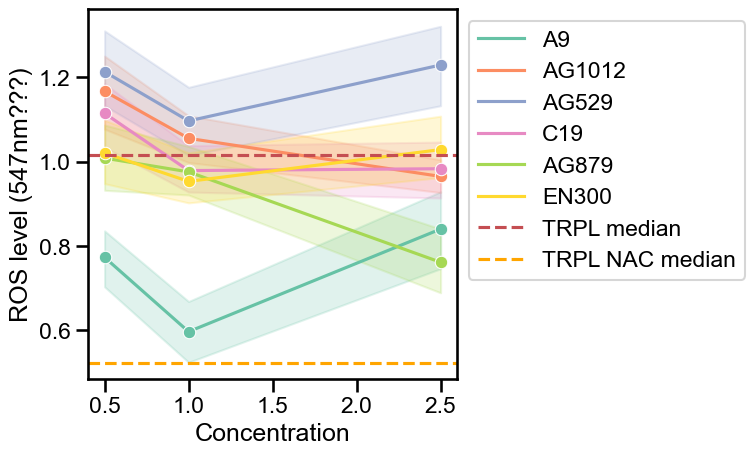

In [5]:
# Set the seaborn style to "talk" and font to "Arial"
sns.set_context("talk")
rcParams['font.family'] = 'Arial'

# Create a list of compounds to exclude from the plot
exclude_compounds = ['TRPL', 'TRPL NAC']

# Create a new DataFrame excluding the specified compounds
plot_df = df[~df['Compound'].isin(exclude_compounds)]

# Create a line plot with the filtered DataFrame
ax = sns.lineplot(data=plot_df, x='Concentration', y='Values', hue='Compound', style='Compound', marker='o', dashes=False, palette="Set2")

# Define colors for the dashed lines
colors = ['#C44E52', 'orange']

# Calculate the median values of the excluded compounds and add them as dashed lines
for i, compound in enumerate(exclude_compounds):
    median_value = df[df['Compound'] == compound]['Values'].median()
    plt.axhline(y=median_value, linestyle='--', color=colors[i], label=f'{compound} median')

# Set plot title and labels
plt.xlabel('Concentration')
plt.ylabel('ROS level (547nm???)')

# Move the legend
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Axis scale
ax.set_box_aspect(1)

# Save the plot
plt.savefig('ROS_similar_compounds' + '.pdf', bbox_inches='tight')
plt.show()
